In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

In [7]:
from google.colab import files
import zipfile



# Specify the path to the zip file
zip_path = '/content/TESS Toronto emotional speech set data.zip'

# Specify the directory to extract to
extract_path = '/content/emotionalspeechdata'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check the contents of the extracted folder
!ls /content/emotionalspeechdata


'TESS Toronto emotional speech set data'


In [8]:
import os

paths = []
labels = []

for dirname, _, filenames in os.walk('/content/emotionalspeechdata'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())

        # Print the length of paths at each iteration
        print(f"Length of paths: {len(paths)}")

        if len(paths) == 2800:
            break

print('Dataset is Loaded')


Length of paths: 1
Length of paths: 2
Length of paths: 3
Length of paths: 4
Length of paths: 5
Length of paths: 6
Length of paths: 7
Length of paths: 8
Length of paths: 9
Length of paths: 10
Length of paths: 11
Length of paths: 12
Length of paths: 13
Length of paths: 14
Length of paths: 15
Length of paths: 16
Length of paths: 17
Length of paths: 18
Length of paths: 19
Length of paths: 20
Length of paths: 21
Length of paths: 22
Length of paths: 23
Length of paths: 24
Length of paths: 25
Length of paths: 26
Length of paths: 27
Length of paths: 28
Length of paths: 29
Length of paths: 30
Length of paths: 31
Length of paths: 32
Length of paths: 33
Length of paths: 34
Length of paths: 35
Length of paths: 36
Length of paths: 37
Length of paths: 38
Length of paths: 39
Length of paths: 40
Length of paths: 41
Length of paths: 42
Length of paths: 43
Length of paths: 44
Length of paths: 45
Length of paths: 46
Length of paths: 47
Length of paths: 48
Length of paths: 49
Length of paths: 50
Length of

In [9]:
len(paths)

2800

In [10]:
paths[:5]

['/content/emotionalspeechdata/TESS Toronto emotional speech set data/YAF_sad/YAF_laud_sad.wav',
 '/content/emotionalspeechdata/TESS Toronto emotional speech set data/YAF_sad/YAF_back_sad.wav',
 '/content/emotionalspeechdata/TESS Toronto emotional speech set data/YAF_sad/YAF_pad_sad.wav',
 '/content/emotionalspeechdata/TESS Toronto emotional speech set data/YAF_sad/YAF_lore_sad.wav',
 '/content/emotionalspeechdata/TESS Toronto emotional speech set data/YAF_sad/YAF_food_sad.wav']

In [11]:
labels[:5]

['sad', 'sad', 'sad', 'sad', 'sad']

In [12]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/emotionalspeechdata/TESS Toronto emot...,sad
1,/content/emotionalspeechdata/TESS Toronto emot...,sad
2,/content/emotionalspeechdata/TESS Toronto emot...,sad
3,/content/emotionalspeechdata/TESS Toronto emot...,sad
4,/content/emotionalspeechdata/TESS Toronto emot...,sad


In [13]:
df['label'].value_counts()

sad        400
disgust    400
angry      400
happy      400
ps         400
neutral    400
fear       400
Name: label, dtype: int64

In [14]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [15]:
extract_mfcc(df['speech'][0])

array([-370.5492    ,  108.155106  ,   23.761242  ,   30.933554  ,
        -18.012096  ,   13.205495  ,    1.3162296 ,  -12.743752  ,
         -2.0972023 ,   -4.8384743 ,  -10.312361  ,   -0.48689216,
        -13.101862  ,    6.9069457 ,  -12.1505575 ,   -4.0263114 ,
          0.83489513,   -5.9709764 ,   -8.353682  ,   -9.996225  ,
         -3.5140848 ,   -9.4447975 ,   -5.035696  ,    0.63653207,
         -7.74479   ,    2.7221587 ,   -5.0543494 ,   -5.6496577 ,
         -1.3839121 ,    1.0619284 ,    5.4918103 ,   14.728121  ,
          5.4503293 ,    8.598646  ,    3.9395652 ,    8.865357  ,
          7.964543  ,   13.499054  ,    8.003388  ,    3.223636  ],
      dtype=float32)

In [16]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))


In [17]:
X_mfcc

0       [-370.5492, 108.155106, 23.761242, 30.933554, ...
1       [-399.7046, 92.66717, 12.387473, 28.240665, 3....
2       [-381.1192, 103.36671, 15.649245, 26.483252, -...
3       [-396.96472, 112.771385, 25.112045, 29.263239,...
4       [-421.77957, 81.3005, 28.309994, 36.949852, 9....
                              ...                        
2795    [-330.7223, 52.871895, -11.129984, 20.94734, -...
2796    [-353.40176, 54.083733, -10.045905, 21.325766,...
2797    [-306.40063, 26.507273, -27.710209, 31.84816, ...
2798    [-321.4261, 56.46854, -12.684838, 17.349707, -...
2799    [-348.9113, 32.3623, -2.4740398, 37.96641, -7....
Name: speech, Length: 2800, dtype: object

In [18]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [19]:
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [20]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [21]:
y = y.toarray()

In [22]:
y.shape

(2800, 7)

In [23]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (2240, 40, 1)
y_train shape: (2240, 7)
X_test shape: (560, 40, 1)
y_test shape: (560, 7)


In [29]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(40, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 38, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 19, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 17, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 8, 64)             0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)              

In [40]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
63/63 [==============================] - 1s 21ms/step - loss: 0.0302 - accuracy: 0.9906 - val_loss: 0.0254 - val_accuracy: 0.9911
Epoch 2/10
63/63 [==============================] - 1s 21ms/step - loss: 0.0301 - accuracy: 0.9906 - val_loss: 0.0182 - val_accuracy: 0.9955
Epoch 3/10
63/63 [==============================] - 1s 14ms/step - loss: 0.0299 - accuracy: 0.9901 - val_loss: 0.0294 - val_accuracy: 0.9866
Epoch 4/10
63/63 [==============================] - 1s 13ms/step - loss: 0.0272 - accuracy: 0.9921 - val_loss: 0.0159 - val_accuracy: 0.9911
Epoch 5/10
63/63 [==============================] - 1s 8ms/step - loss: 0.0200 - accuracy: 0.9945 - val_loss: 0.0100 - val_accuracy: 0.9955
Epoch 6/10
63/63 [==============================] - 0s 7ms/step - loss: 0.0146 - accuracy: 0.9945 - val_loss: 0.0113 - val_accuracy: 0.9955
Epoch 7/10
63/63 [==============================] - 0s 7ms/step - loss: 0.0153 - accuracy: 0.9950 - val_loss: 0.0127 - val_accuracy: 0.9955
Epoch 8/10
63/63

In [41]:
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {accuracy * 100:.2f}%")


18/18 [==============================] - 0s 6ms/step - loss: 0.0311 - accuracy: 0.9893
Test Accuracy: 98.93%


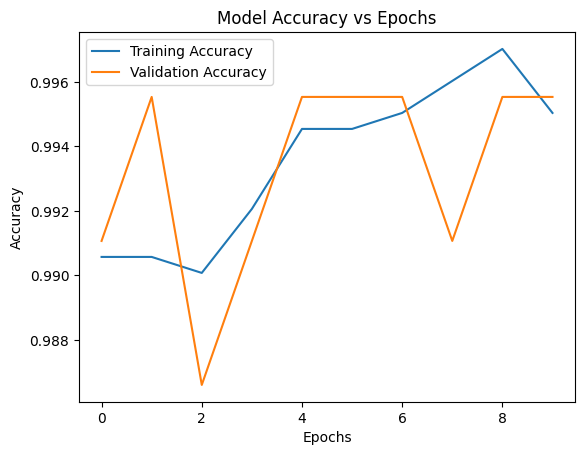

In [42]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()